## matplotlib.axes.Axes.errorbar

#### Axes.errorbar(self, x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)

Plot y versus x as lines and/or markers with attached errorbars.

x, y define the data locations, xerr, yerr define the errorbar sizes. By default, this draws the data markers/lines as well the errorbars. Use fmt='none' to draw errorbars without any data markers.

#### Parameters:	
x, y : scalar or array-like
The data positions.

xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
The errorbar sizes:

    scalar: Symmetric +/- values for all data points.
    shape(N,): Symmetric +/-values for each data point.
    shape(2,N): Separate - and + values for each bar. First rowcontains the lower errors, the second row contains the upper errors.
    None: No errorbar.
    Note that all error arrays should have positive values.

fmt : plot format string, optional, default: ''
The format for the data points / data lines. See plot for details.

Use 'none' (case insensitive) to plot errorbars without any data markers.

ecolor : mpl color, optional, default: None
A matplotlib color arg which gives the color the errorbar lines. If None, use the color of the line connecting the markers.

elinewidth : scalar, optional, default: None
The linewidth of the errorbar lines. If None, the linewidth of the current style is used.

capsize : scalar, optional, default: None
The length of the error bar caps in points. If None, it will take the value from rcParams["errorbar.capsize"].

capthick : scalar, optional, default: None
An alias to the keyword argument markeredgewidth (a.k.a. mew). This setting is a more sensible name for the property that controls the thickness of the error bar cap in points. For backwards compatibility, if mew or markeredgewidth are given, then they will over-ride capthick. This may change in future releases.

barsabove : bool, optional, default: False
If True, will plot the errorbars above the plot symbols. Default is below.

lolims, uplims, xlolims, xuplims : bool, optional, default: False

``These arguments can be used to indicate that a value gives only upper(lolims/xlolims)/lower(uplims/xuplims) limits.`` In that case a caret symbol is used to indicate this. lims-arguments may be of the same type as xerr and yerr. To use limits with inverted axes, set_xlim() or set_ylim() must be called before errorbar().

errorevery : positive integer, optional, default: 1
Subsamples the errorbars. e.g., if errorevery=5, errorbars for every 5-th datapoint will be plotted. The data plot itself still shows all data points.

#### Returns:	
container : ErrorbarContainer
The container contains:

plotline: Line2D instance of x, y plot markers and/or line.
caplines: A tuple of Line2D instances of the error bar caps.
barlinecols: A tuple of LineCollection with the horizontal and vertical error ranges.
#### Other Parameters:	
**kwargs
All other keyword arguments are passed on to the plot command for the markers. For example, this code makes big red squares with thick green edges:

x,y,yerr = rand(3,10)

errorbar(x, y, yerr, marker='s', mfc='red',mec='green', ms=20, mew=4)

where mfc, mec, ms and mew are aliases for the longer property names, markerfacecolor, markeredgecolor, markersize and markeredgewidth.

Valid kwargs for the marker properties are Lines2D properties

### Errorbar limit selection

Illustration of selectively drawing lower and/or upper limit symbols on errorbars using the parameters __uplims, lolims of errorbar.__

#### Alternatively, you can use 2xN values to draw errorbars in only one direction.

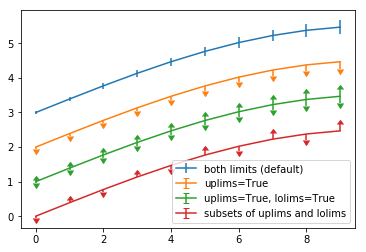

In [2]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

#### Similarly ``xuplims``and ``xlolims`` can be used on the horizontal xerr errorbars.

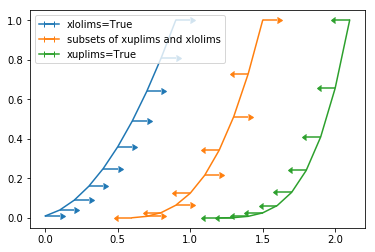

In [3]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=True')

plt.legend()
plt.show()

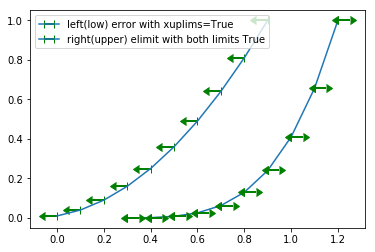

In [67]:
import numpy as np

fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2
y2 = (x + 0.1)**4
xerr = np.asarray([[0.05, 0.05] * 5, [0, 0] * 5]).reshape(2,10)

plt.errorbar(x, y, xerr=xerr, xlolims=False, xuplims=True, label='left(low) error with xuplims=True', ecolor='g', 
             elinewidth=2, capsize=4, capthick=1)
plt.errorbar(x+0.3, y2, xerr=xerr[::-1], xlolims=True, xuplims=True, label='right(upper) elimit with both limits True',
             ecolor='g', elinewidth=2, capsize=4, capthick=1, barsabove=True )
#capsize - error cap length
#capthick - error  cap width
plt.legend()
plt.show()

In [45]:
xerr[::-1]

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]])

In [46]:
xerr

array([[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

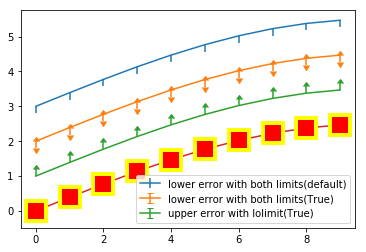

In [68]:
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.asarray([[0.2, 0.2] * 5, [0, 0] * 5]).reshape(2,10)

plt.errorbar(x, y + 3, yerr=yerr, label='lower error with both limits(default)')
plt.errorbar(x, y + 2, yerr=yerr, lolims=True, uplims=True, label='lower error with both limits(True)')
plt.errorbar(x, y + 1, yerr=yerr[::-1], lolims=True, label='upper error with lolimit(True)')
plt.errorbar(x, y, yerr, marker='s', mfc='red', mec='yellow', ms=20, mew=4)

plt.legend()
plt.show()